Linear Regression:

**Y = wX + b**

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w  =  w - α*dw

b  =  b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

**Partial Derivatives in Gradient Descent:**

dw = ∂L/∂w = (1/m) * Σ(wX + b - Y)X


db = ∂L/∂b = (1/m) * Σ(wX + b - Y)

where:
- m is the number of training examples
- Σ represents the sum over all training examples
- L is the loss function (Mean Squared Error)
- X is the input feature
- Y is the actual output

In [1]:
# import numpy library
import numpy as np


In [2]:
# Linear Regression
class LinearRegression: 
    # initating the parameters of the model (learning rate, no of iterations)
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
    
    # fitting the model
    def fit(self, X, Y):
        
        # no of training examples abd no of features
        self.no_of_training_examples, self.no_of_features = X.shape # X.shape = (no_of_training_examples, no_of_features)
        
        # initializing the weights and bias
        self.weights = np.zeros(self.no_of_features) # y = b + w1x1 + w2x2 + w3x3.....     #y = wx + , w = weights, b = bias in the case of single feature  but in the case of multiple features w = [w1, w2, w3, ...] that why we are using np.zeros
        self.bias = 0
        self.X = X
        self.Y = Y
        
    #    gradient descent
        for i in range(self.no_of_iterations):
            self.update_weights()
        
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias  # y = wx + b
    
    def update_weights(self):
        
        Y_prediction = self.predict(self.X)
        
        # calculating the derivatives
        dw = -(2*self.X.T.dot(self.Y - Y_prediction))/self.no_of_training_examples
        
        db = -2*np.sum(self.Y - Y_prediction)/self.no_of_training_examples
        
        # updating the weights and bias
        self.weights = self.weights - self.learning_rate*dw
        self.bias = self.bias - self.learning_rate*db


    

using linear regression 


In [55]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



In [56]:
# data preprocessing
salary_data = pd.read_csv(
    "/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/data/ai_and_ml/salary_data.csv"
)

In [57]:
# print the first 5 rows of the dataframe
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [58]:
# no of rows and columns
salary_data.shape

(30, 2)

In [59]:
# check for missing values
salary_data.isnull().sum()


YearsExperience    0
Salary             0
dtype: int64

In [60]:
# describe the data
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [61]:
# info of the data
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [62]:
# separating features and target
#X = salary_data["YearsExperience"].values
#Y = salary_data["Salary"].values
X = salary_data.iloc[:, :-1].values
Y = salary_data.iloc[:, 1].values
print(X)
print(Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [63]:
# split the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((20, 1), (10, 1), (20,), (10,))

In [64]:
# training the model
model = LinearRegression(learning_rate=0.01, no_of_iterations=1000)


In [65]:
# fitting the model
model.fit(X_train, Y_train)

In [66]:
# printing the weights and bias
print("weight: ", model.weights[0], "bias: ", model.bias)

weight:  9580.301196603597 bias:  23226.38946603212


**Y = 9580.3011966(X) + 23226.38946603212**



In [67]:
# predicting the values
Y_pred = model.predict(X_test)

In [68]:
print(Y_pred)

[ 35680.78102162  33764.7207823   66337.74485075  58673.50389347
  91246.52796192  80708.19664565 101784.85927818  51967.29305584
  42386.99185924  88372.43760294]


visualising the pridicted value and actual value

Text(0, 0.5, 'Salary')

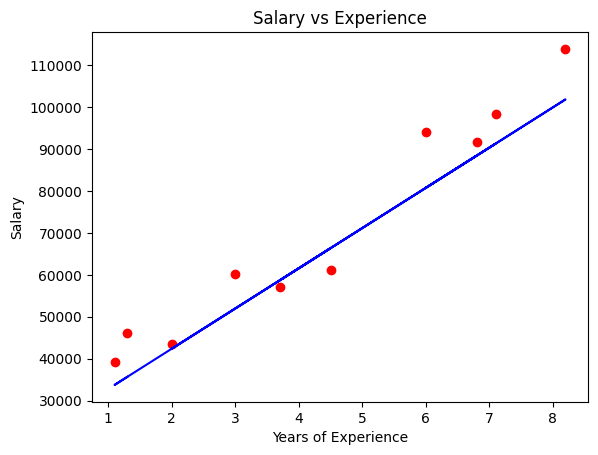

In [69]:
# visualizing the predcted values with the actual values
plt.scatter(X_test, Y_test, color="red")
plt.plot(X_test, Y_pred, color="blue")
plt.title("Salary vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
